In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import string

import pickle as pk

In [2]:
save_folder = "output/"
name_dict = "dict_array_"
def transform_data(train_pulses, M_lda, S_lda, Tr, R, origin):
    XT = (train_pulses - M_lda)/S_lda
    XT = np.dot(XT, Tr)
    XT = np.dot(XT, R.T) 
    XT = XT - origin
    XT[:,0] = -XT[:,0]
    XT[:,2] = -XT[:,2]
    return XT

M_lda = np.loadtxt(save_folder + name_dict + 'M_lda.csv', delimiter=' ')
Tr = np.loadtxt(save_folder + name_dict + 'Tr.csv', delimiter=' ')
R = np.loadtxt(save_folder + name_dict + 'R.csv', delimiter=' ')
S_lda = np.loadtxt(save_folder + name_dict + 'S_lda.csv', delimiter=' ')
origin = np.loadtxt(save_folder + name_dict + 'origin.csv', delimiter=' ')
with open(save_folder + 'dico.pkl', 'rb') as file:
    dict_learner = pk.load(file)

In [3]:
Tr

array([[-629.17649403, -285.08012686, 1209.28561986],
       [-422.64729375, -193.32884948,  818.50525233],
       [-220.44137008, -101.35455289,  422.23160939],
       [ 159.57599766,   73.10899688, -306.226839  ],
       [ 169.32789497,   77.0364413 , -325.91165214],
       [ 253.90814484,  115.19666319, -488.35350929],
       [ 256.27848428,  116.15035468, -492.14531428],
       [ 175.55420312,   79.89355549, -337.30666043],
       [ 261.46371693,  118.39949019, -502.2865146 ],
       [  42.45655255,   19.48382864,  -81.51914329]])

# Load data

In [4]:
df_params = pd.read_csv('dataset/dataset/params_npq_score.csv')
df_metrics = pd.read_csv('dataset/dataset/metrics_npq_score.csv')

In [5]:
#df_params = pd.read_csv('filtered/params_filtered.csv')
#df_metrics = pd.read_csv('filtered/metrics_filtered.csv')

In [6]:
new_df = df_params[df_params["strain_state"]=="cc124"]
np.unique(new_df["experiment"])

array(['h'], dtype=object)

In [7]:
#df_params = pd.read_csv('filtered/params_filtered.csv')
#df_metrics = pd.read_csv('filtered/metrics_filtered.csv')

In [8]:
experiment_names = list(string.ascii_lowercase)

C:\Users\alien\AppData\Local\Temp\ipykernel_35576\2129901713.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (13,6))


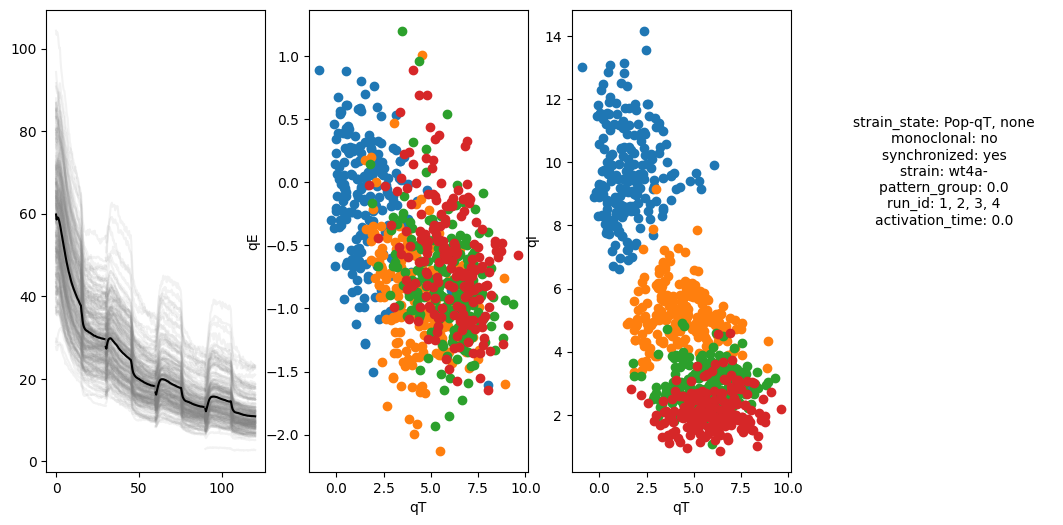

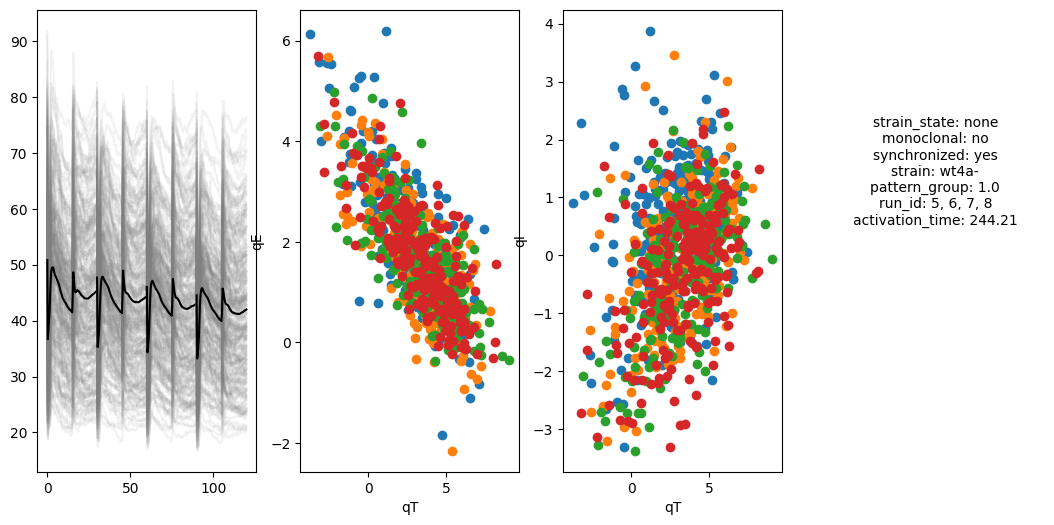

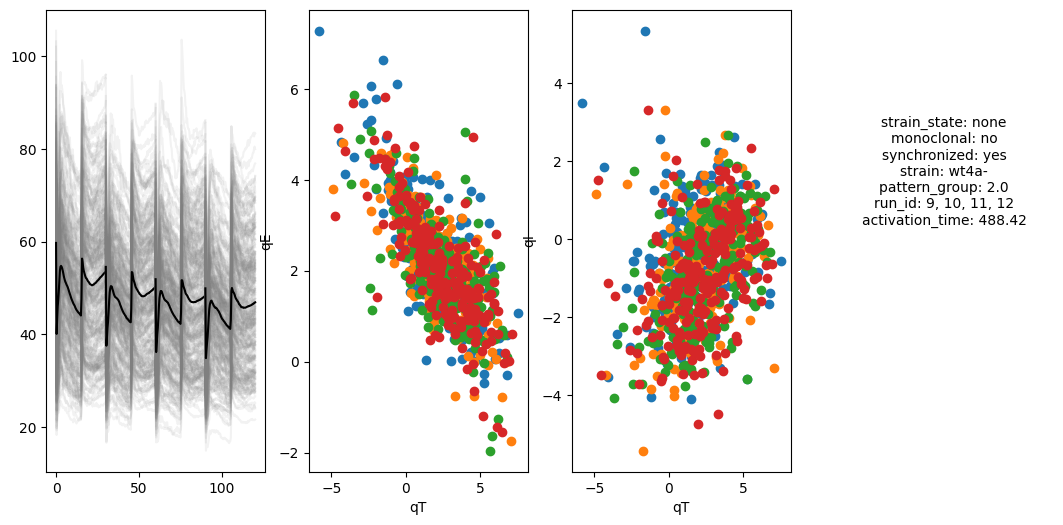

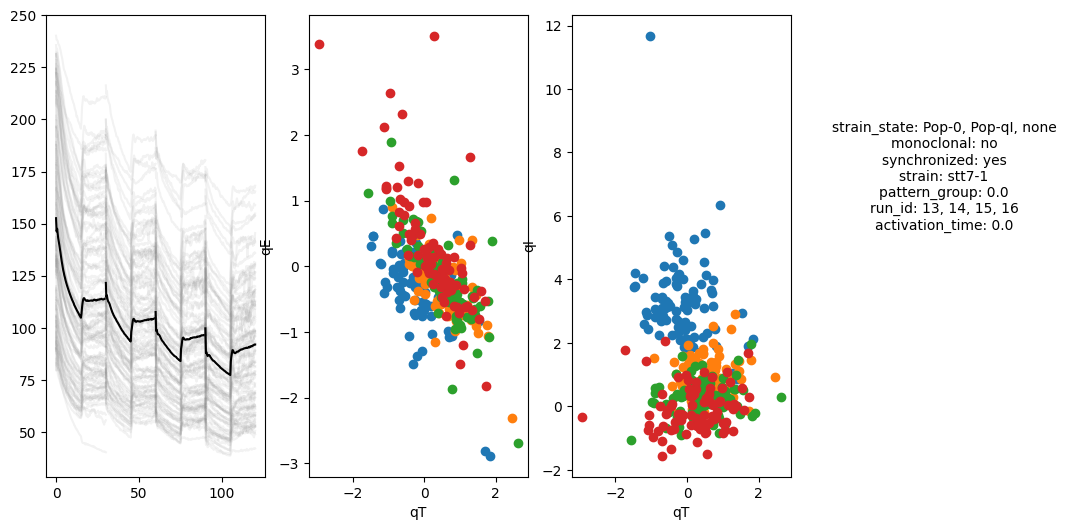

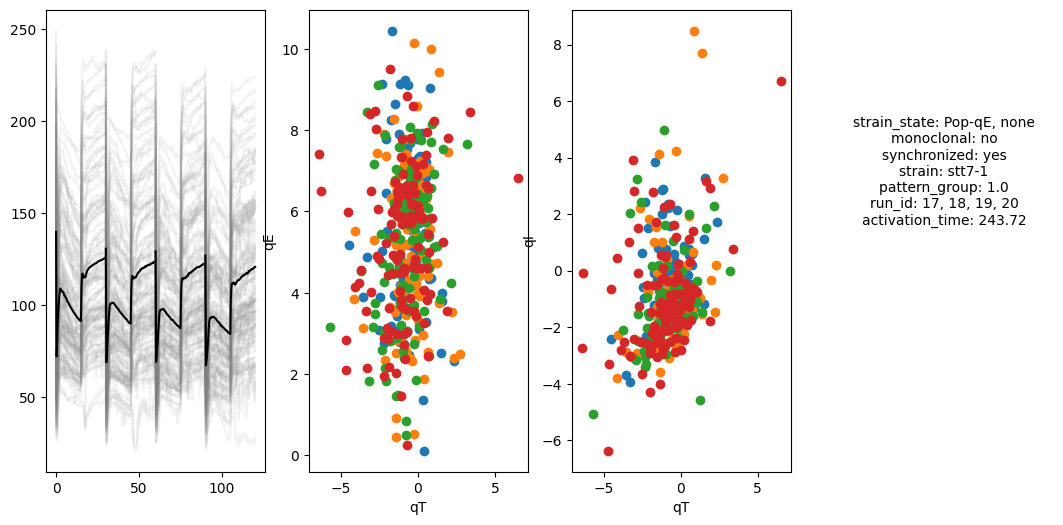

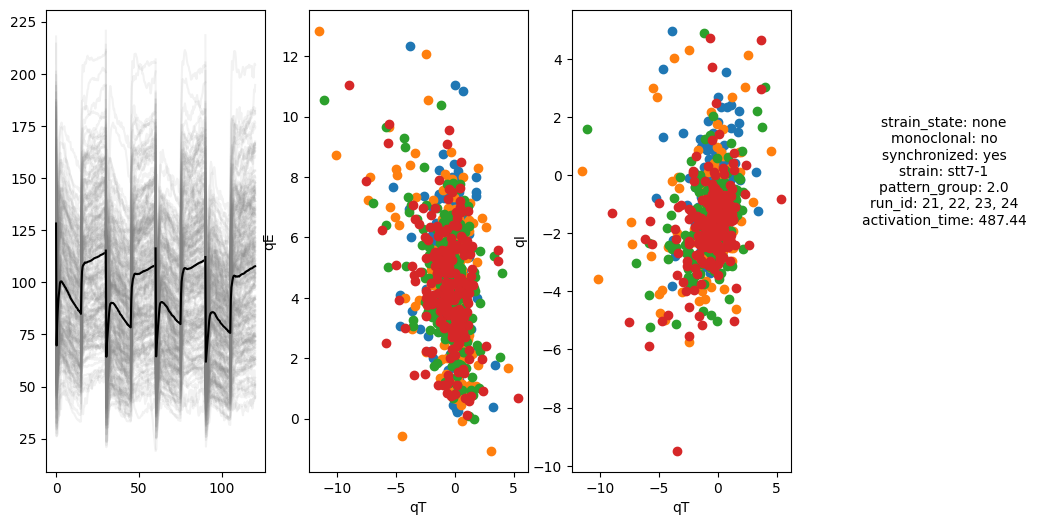

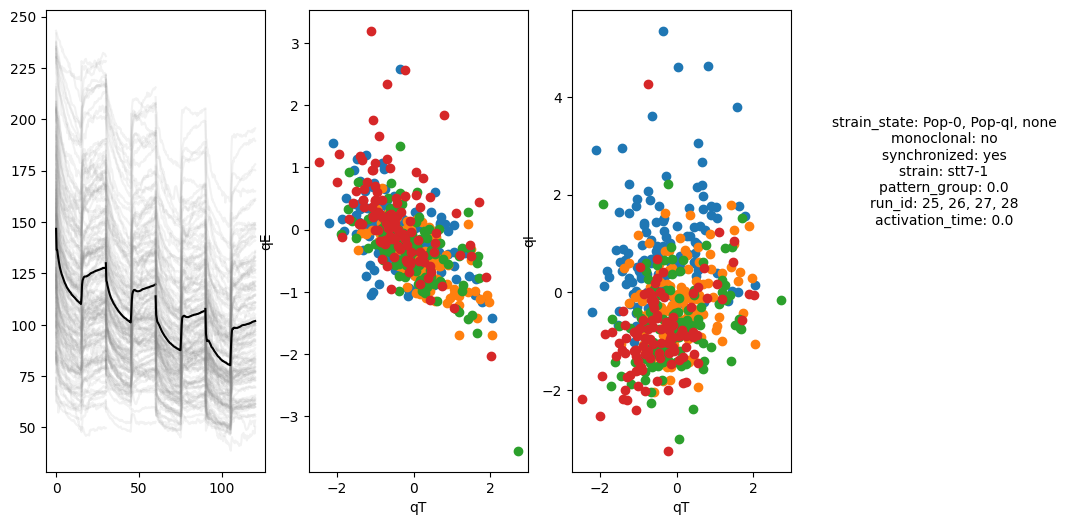

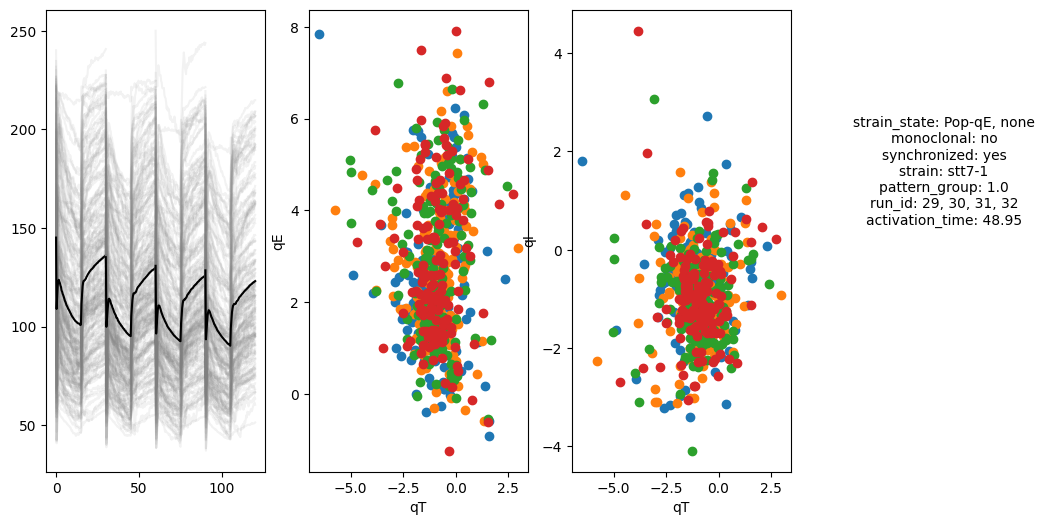

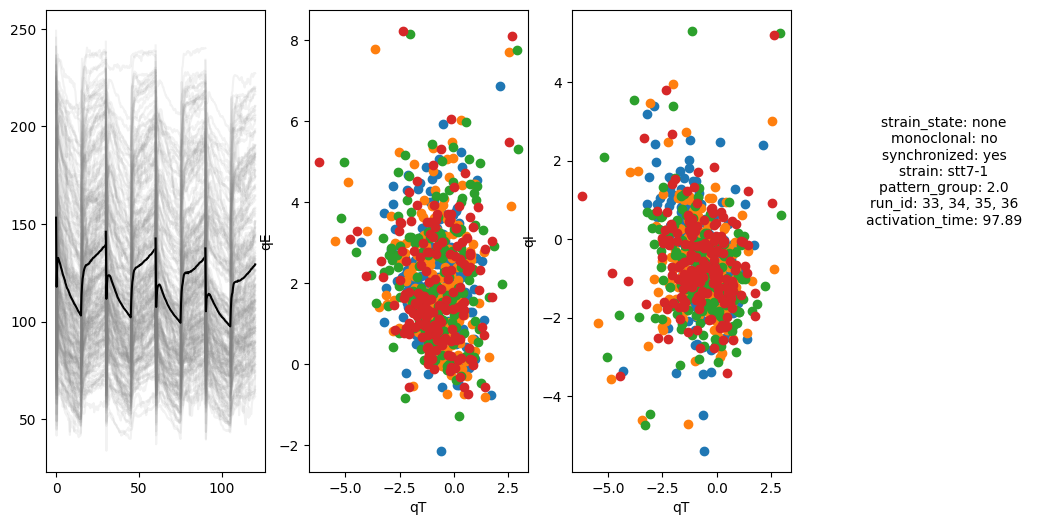

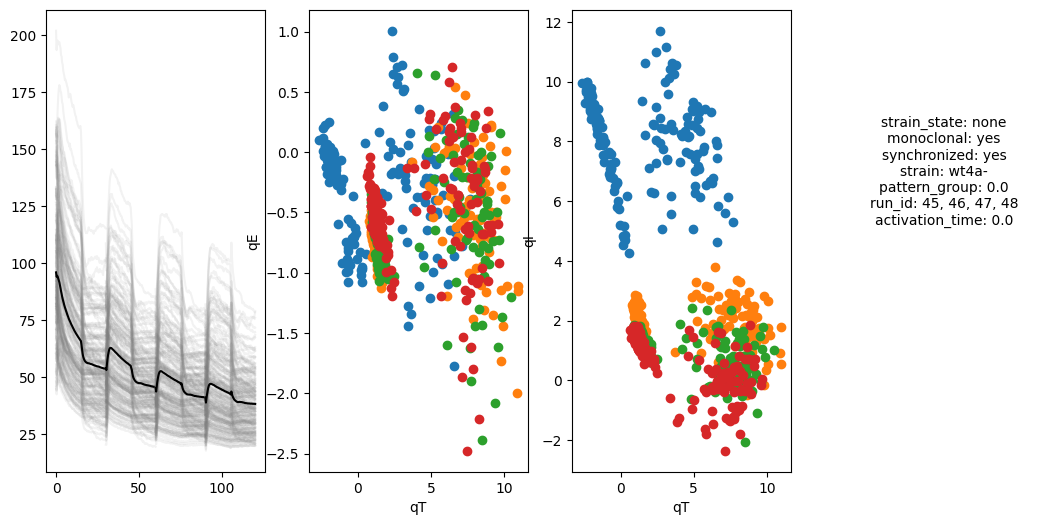

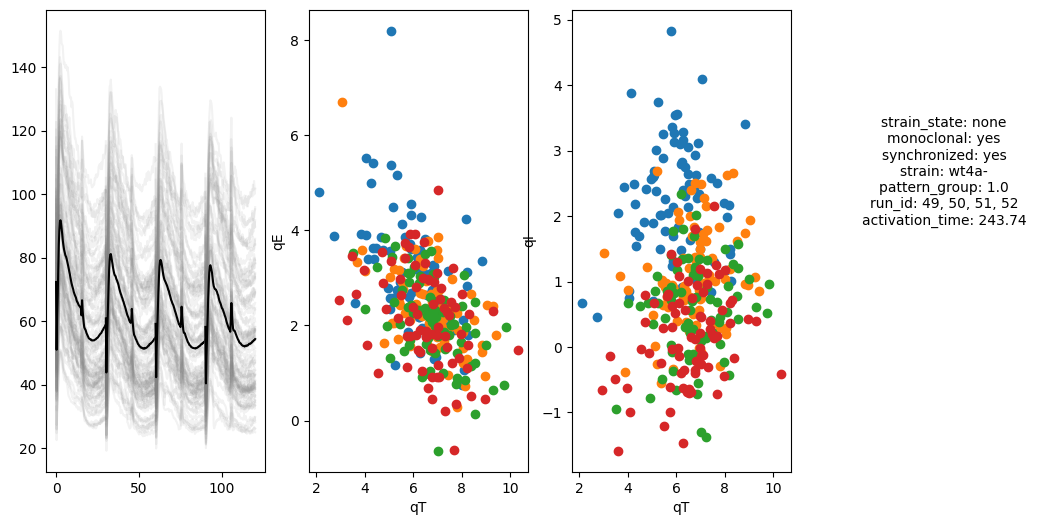

<Figure size 1300x600 with 0 Axes>

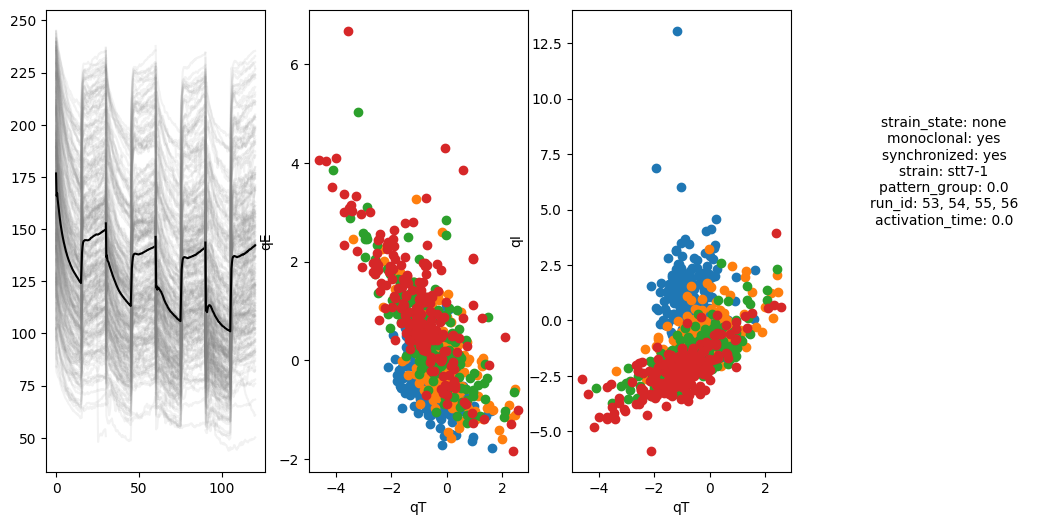

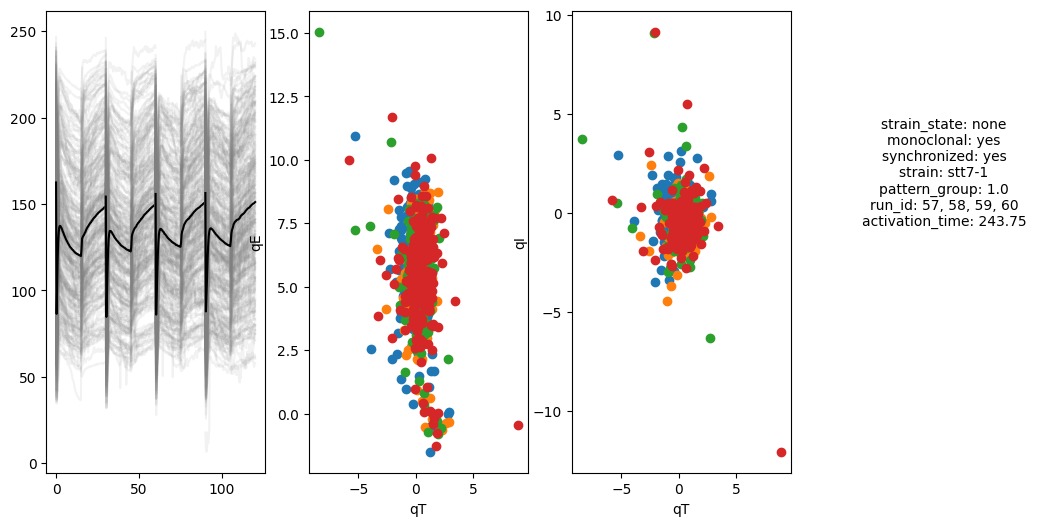

<Figure size 1300x600 with 0 Axes>

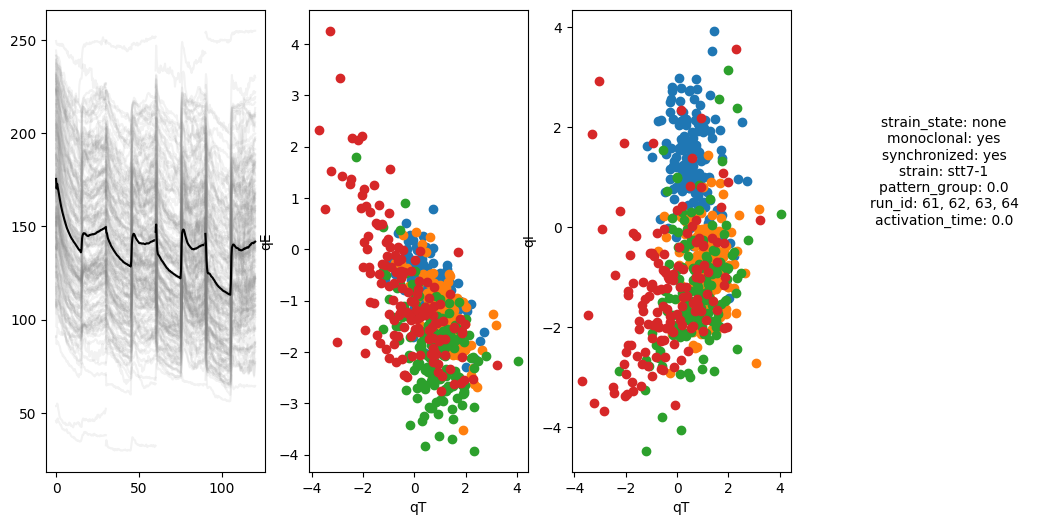

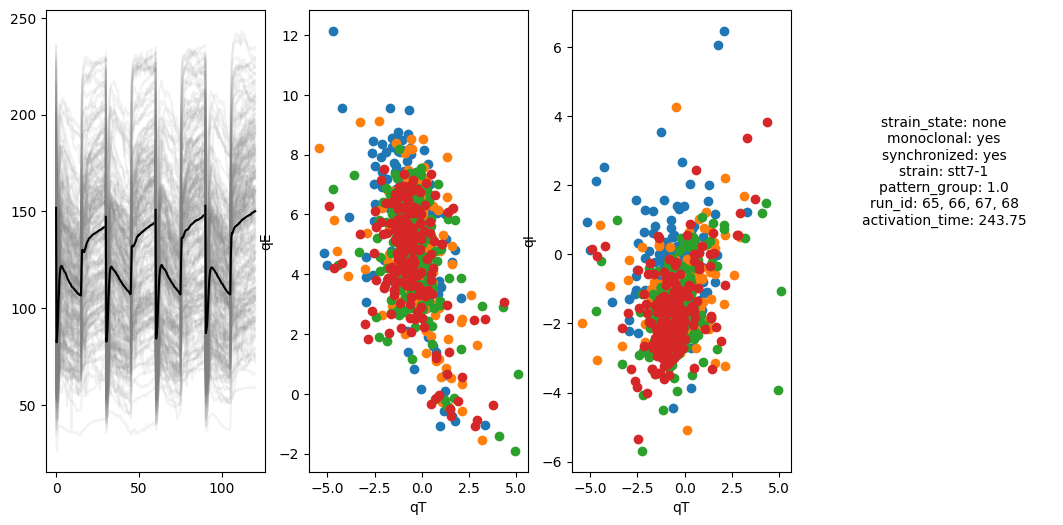

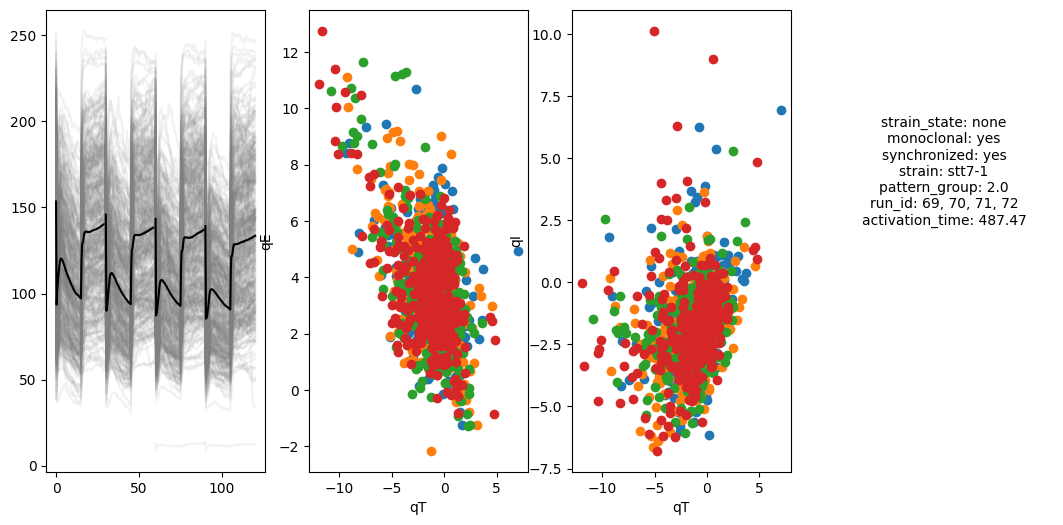

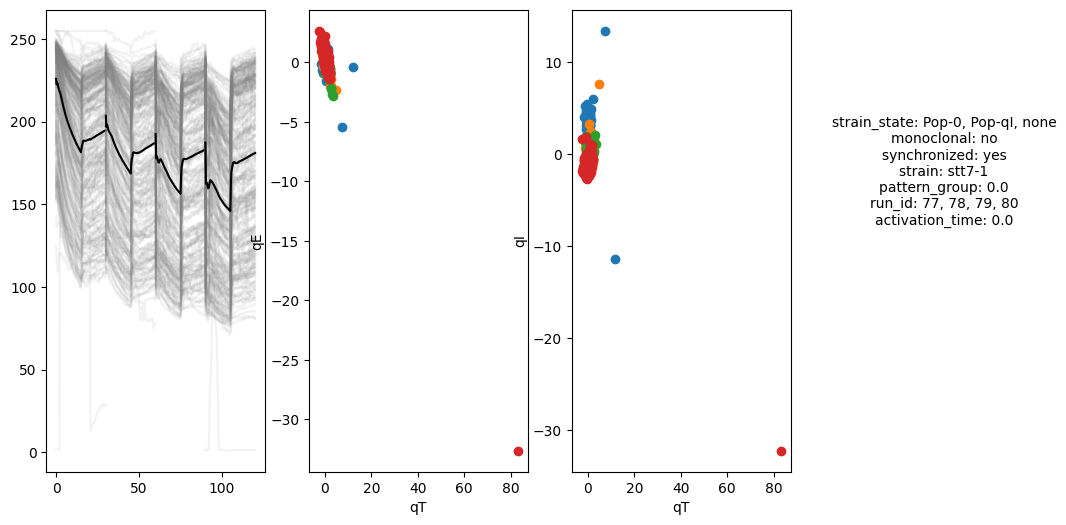

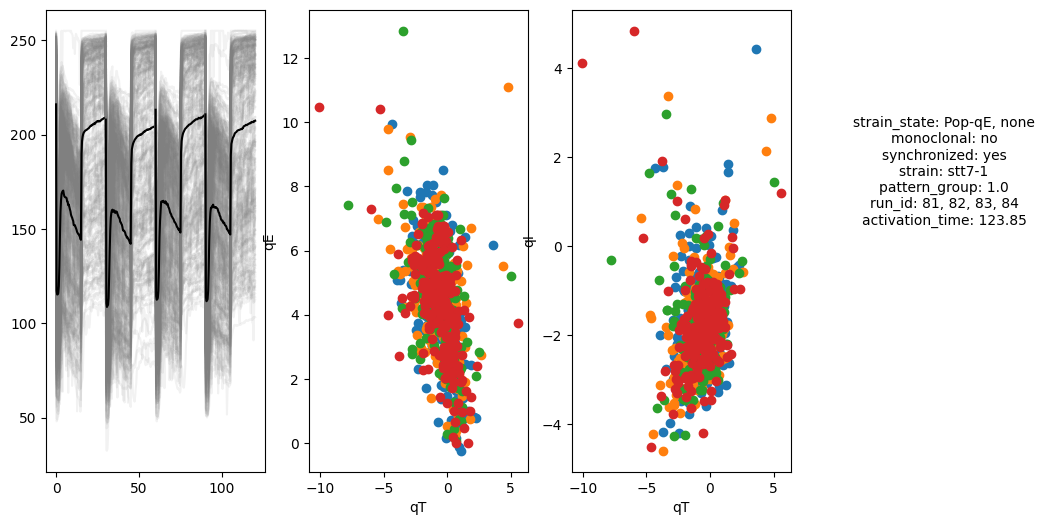

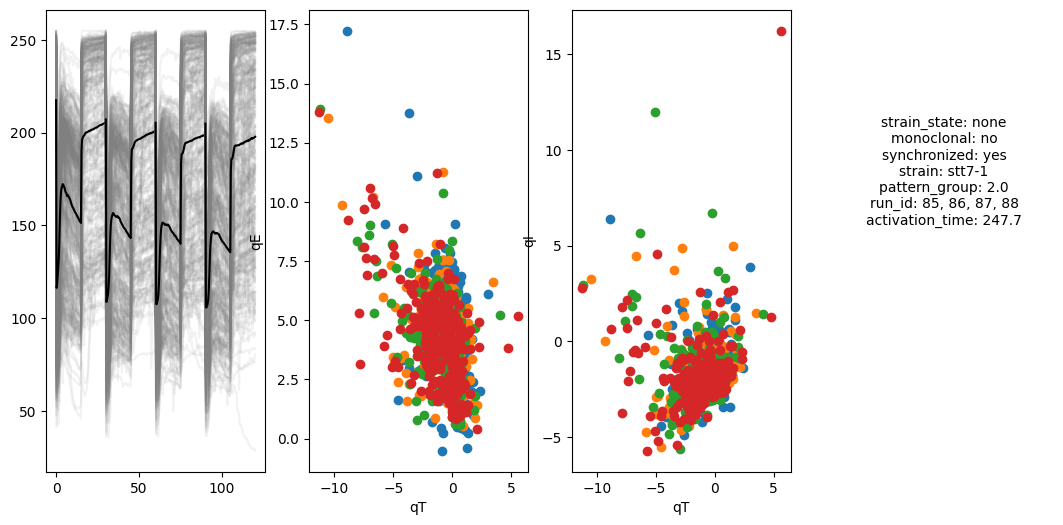

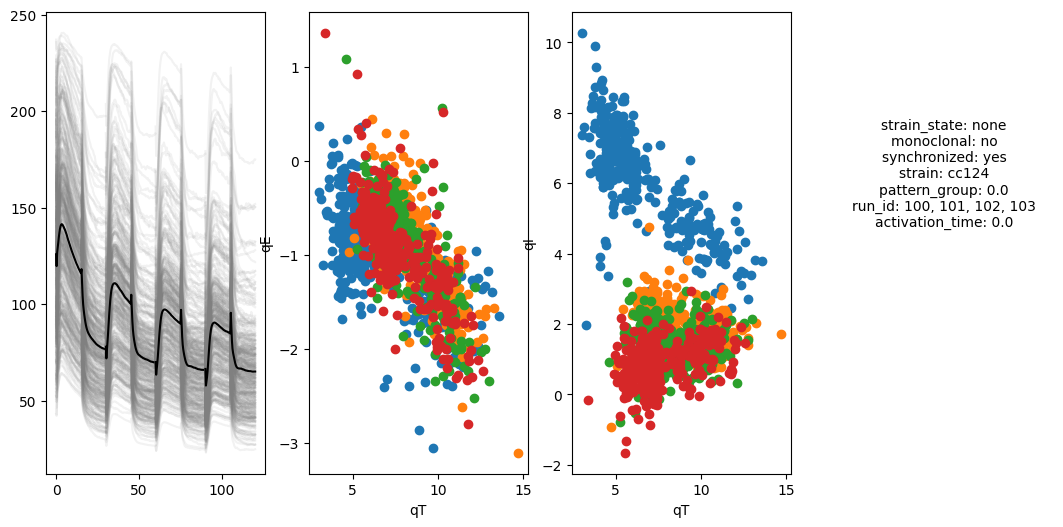

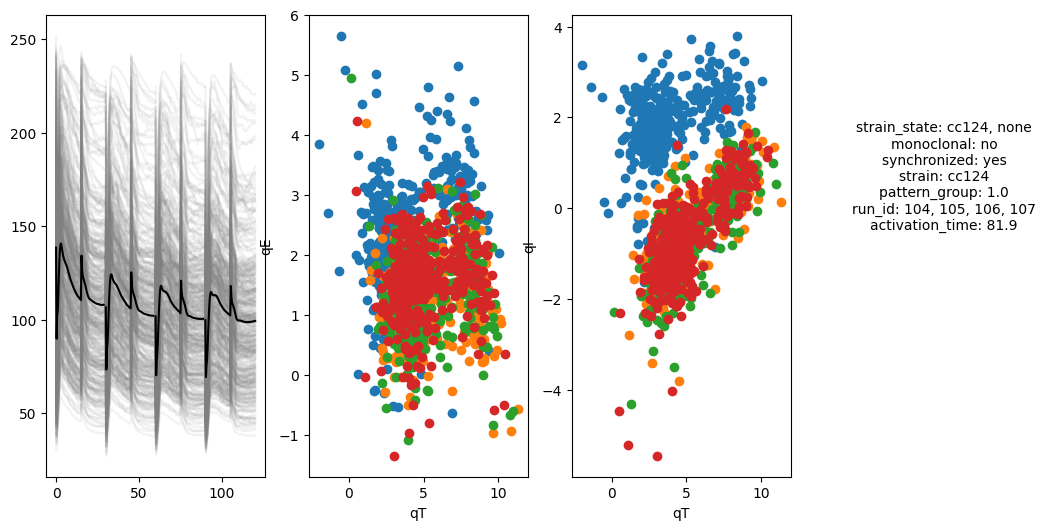

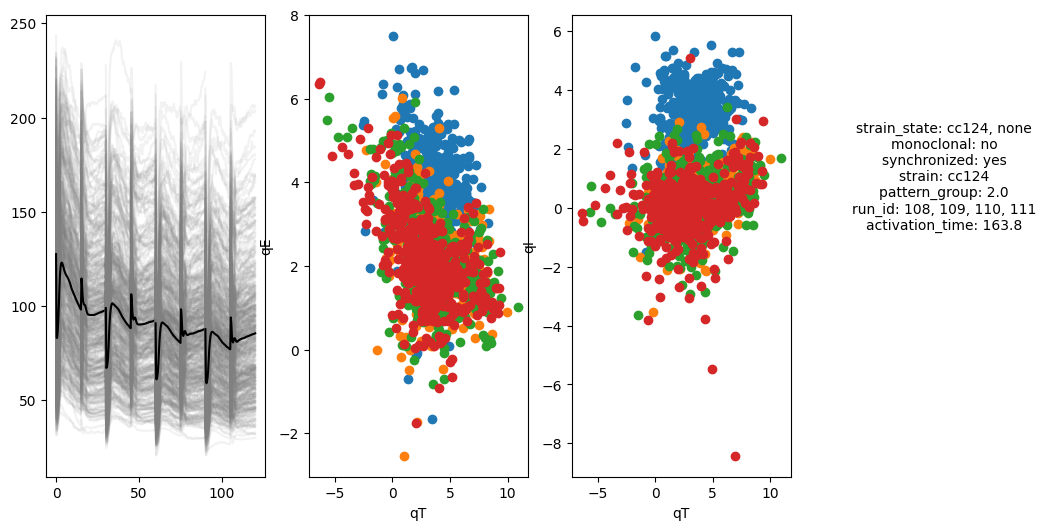

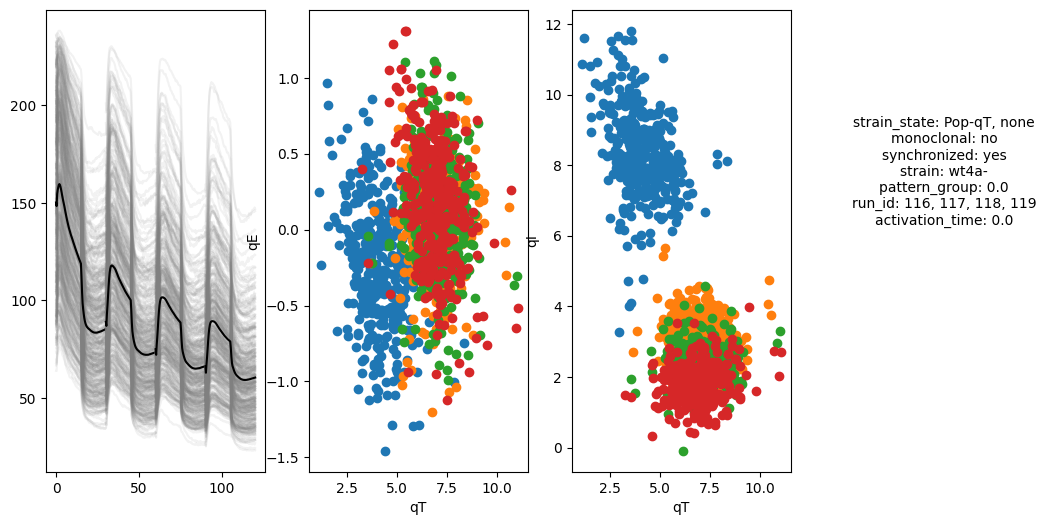

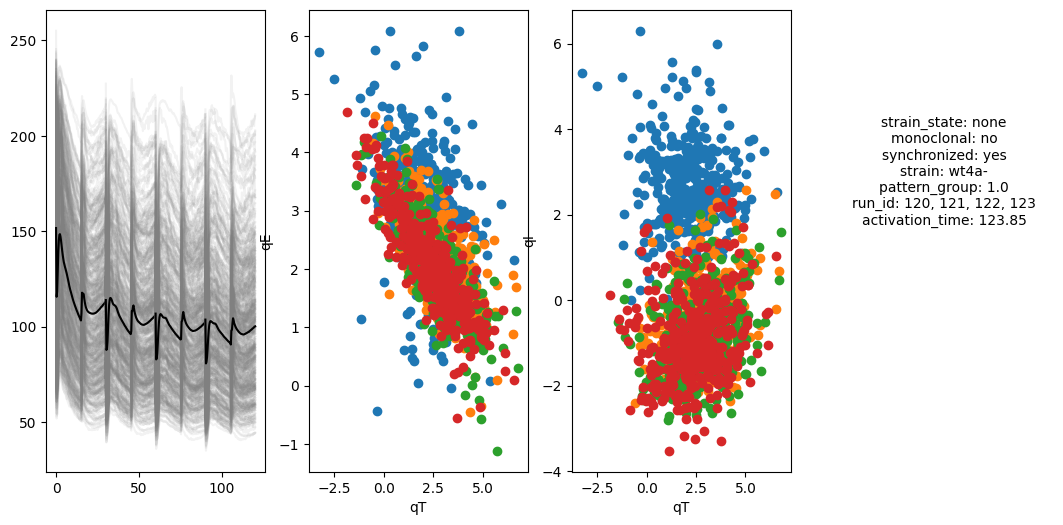

<Figure size 1300x600 with 0 Axes>

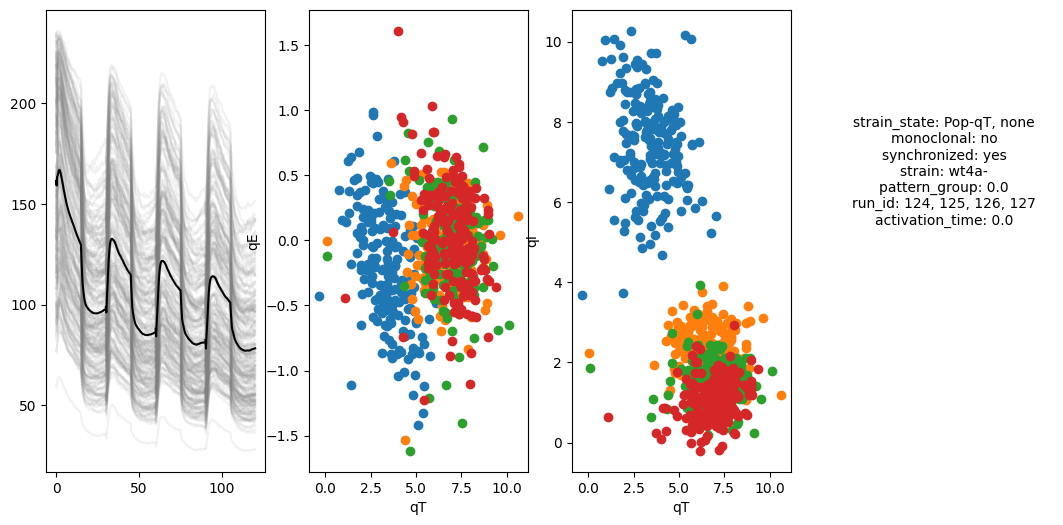

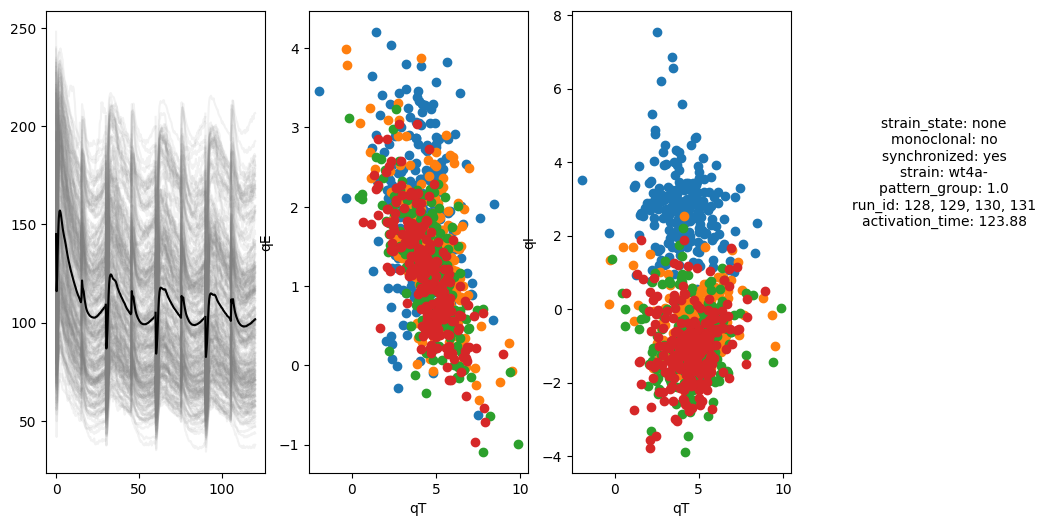

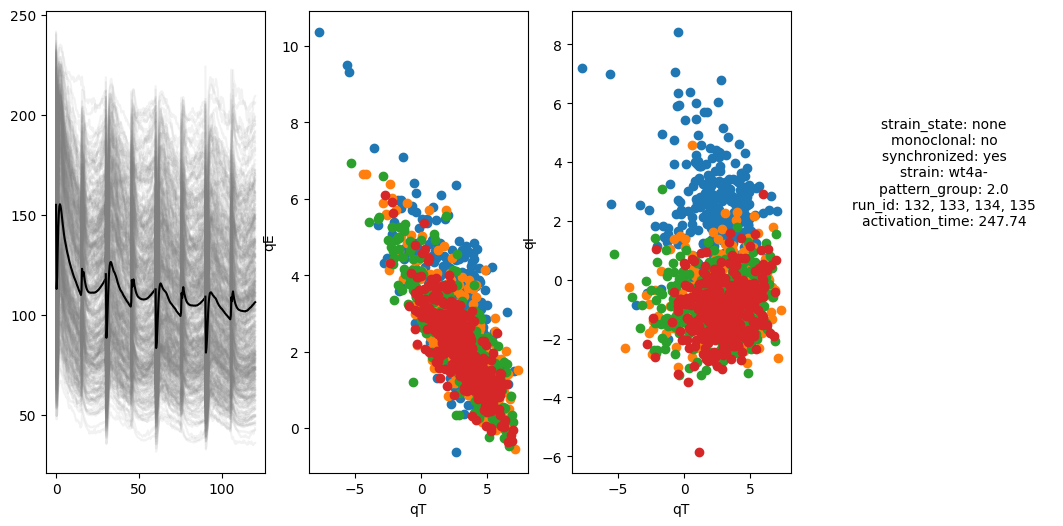

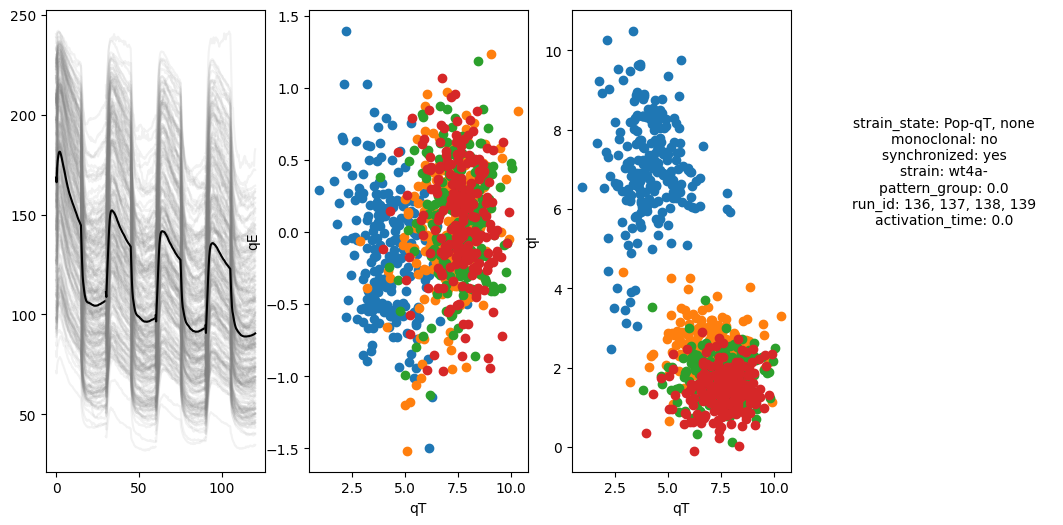

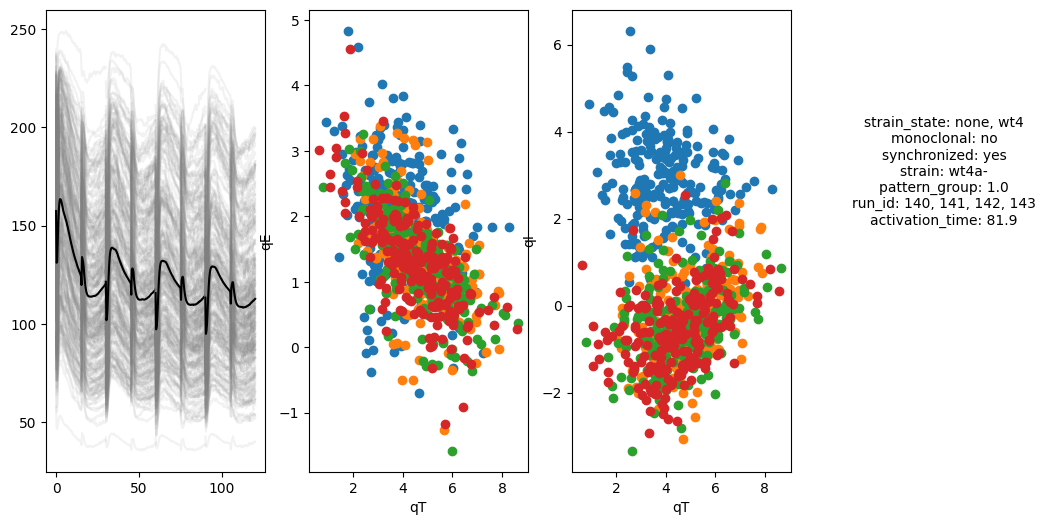

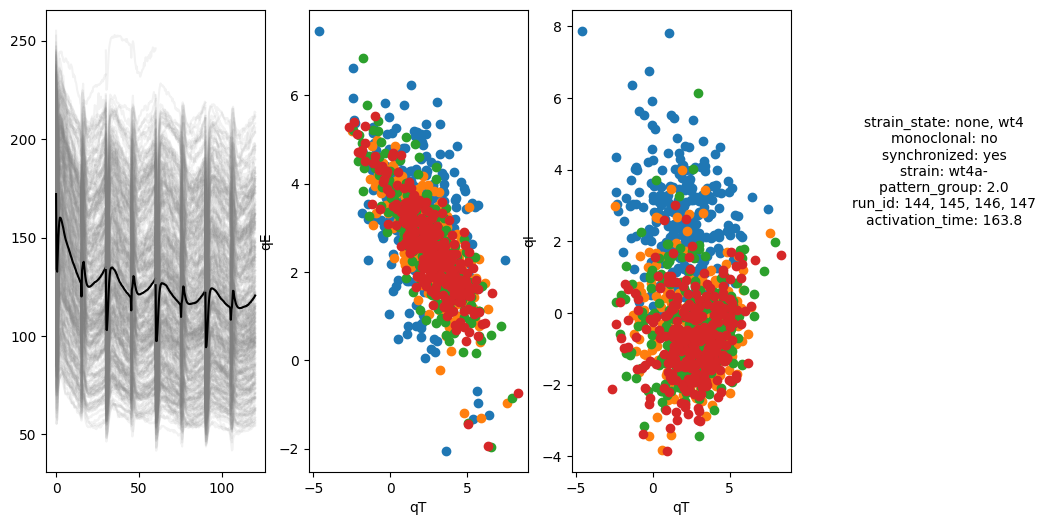

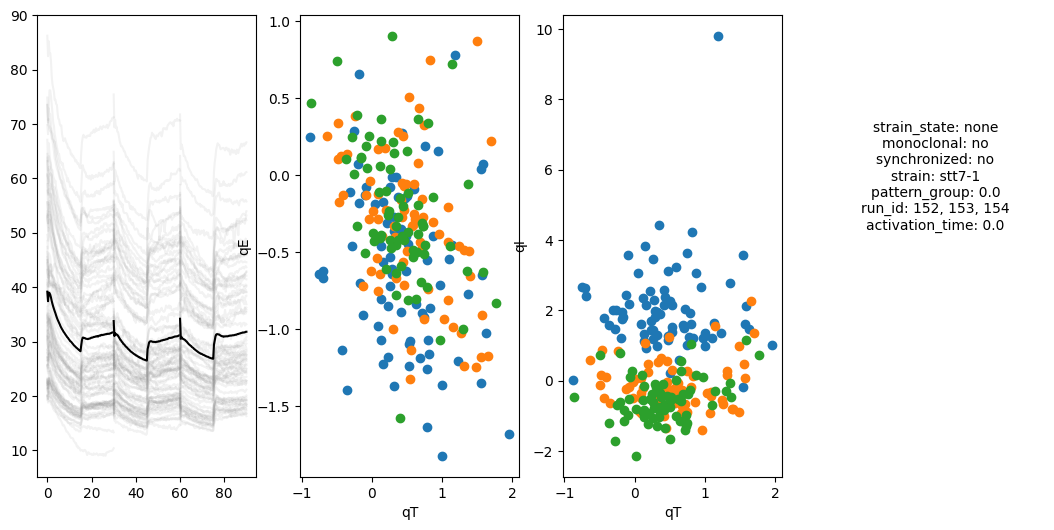

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

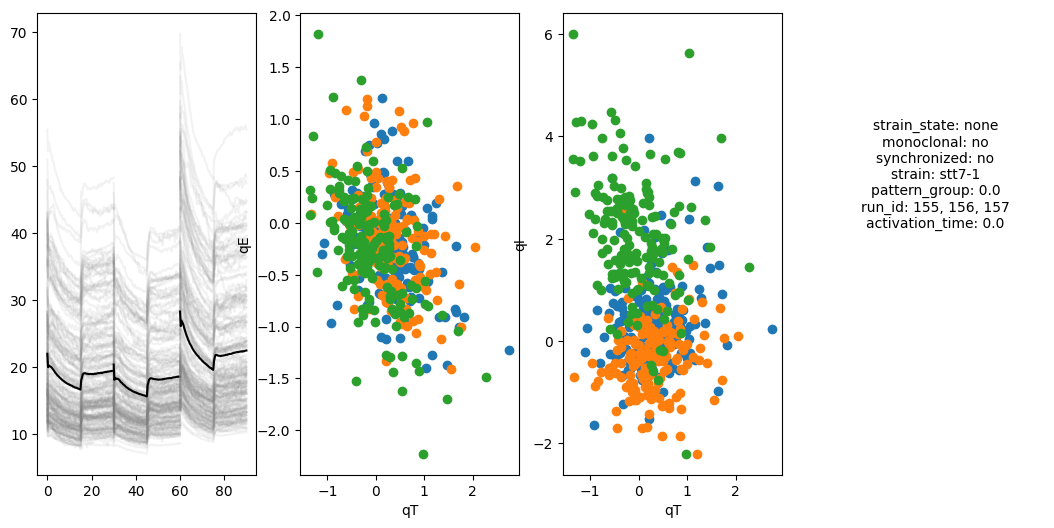

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

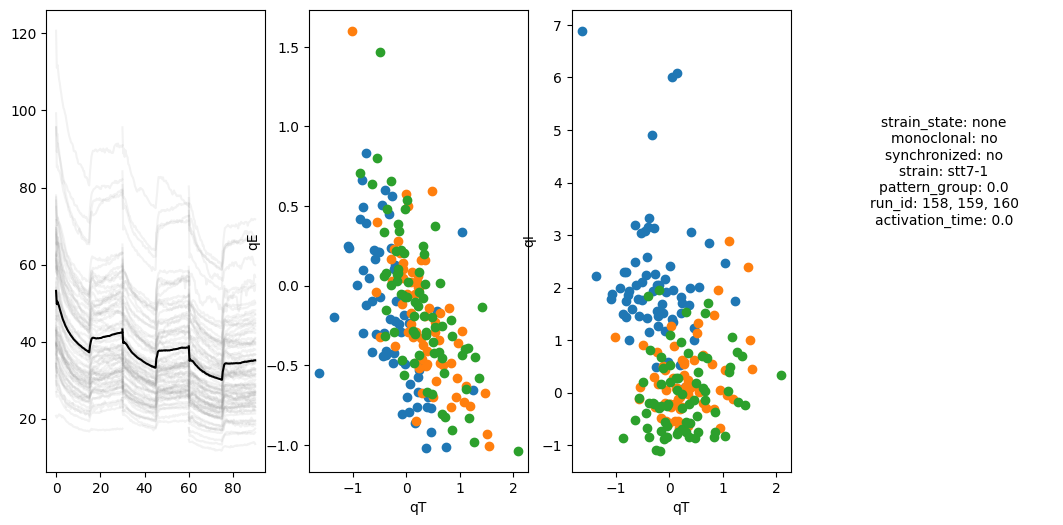

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

In [9]:
for name in experiment_names: 
    s1 = df_params["experiment"]==name

    for pattern_group in range(3):
        plt.figure(figsize = (13,6))
        s2 = df_params["pattern_group"]==pattern_group
        loc_df = df_params[s1*s2]
        string_pattern = ''
        for col_name in ["strain_state","monoclonal","synchronized", "strain", "pattern_group", "run_id", "activation_time"]:
            unique_elements = np.unique(loc_df[col_name].values)
            unique_string = ', '.join(map(str, unique_elements))
            string_pattern += col_name + ": " + unique_string + "\n"
                                     
        for pattern_number in range(4):
            s3 = df_params["pattern_number"]==pattern_number
            y = df_metrics[s1*s2*s3]
            
            y= y.drop(columns=['run_id', 'algae'])
            y = np.array(y)
            
        
            if len(y)!=0:
                start = pattern_number*30
                
                time = np.linspace(start, 30 + start, 91)
                plt.subplot(1,4,1)
                plt.plot(time, y.T, color = "grey", alpha = 0.1)
                plt.plot(time, np.mean(y, axis = 0), color = "k")

                y = y/np.expand_dims(np.sum(y, axis = 1), axis = 1)
                transform = dict_learner.transform(y)
                XT = transform_data(transform, M_lda, S_lda, Tr, R, origin)
                plt.subplot(1,4,2)
                plt.scatter(XT[:,0], XT[:,1])
                plt.xlabel("qT")
                plt.ylabel("qE")
                plt.subplot(1,4,3)
                plt.scatter(XT[:,0], XT[:,2])
                plt.xlabel("qT")
                plt.ylabel("qI")
                plt.subplot(1,4,4)
                if pattern_number ==0:
                    plt.text(0.5, 0.5, string_pattern, fontsize=10, color='black', ha='center')
                    plt.axis("off")